In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns
from __future__ import division
from IPython.core.debugger import set_trace

### Regularizaed Logistic Regression

In [2]:
data = pd.read_csv('./data/problem1data.txt', header=None)
data.columns = ['x1', 'x2', 'y']

In [3]:
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


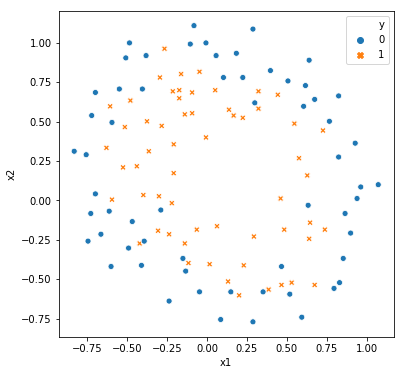

In [4]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=data, x='x1', y='x2', style='y', hue='y')
plt.show()

In [5]:
X = data[['x1', 'x2']].values
Y = data['y'].values.reshape(-1, 1)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
def mapFeatures(X, degree):
    poly_feature = PolynomialFeatures(degree=degree)
    return poly_feature, poly_feature.fit_transform(X)

def weighted_sum(X, thetas):
    return np.matmul(X, thetas)

def sigmoid(Z):
    return 1.0 / (1.0 + np.exp(Z))

def regularized_cost_function(thetas, lambda_param, X, Y):
    m = X.shape[0]
    Y_pred = sigmoid(weighted_sum(X, thetas)).flatten()
    Y = Y.flatten()
    cost = (-1.0 / m) * (Y.dot(np.log(Y_pred)) + (1-Y).dot(np.log(1-Y_pred))) + (lambda_param / (2.0*m) * sum(np.square(thetas[1:])))
    if np.isnan(cost):
        cost = np.inf
    return cost
        

def gradient_regularized_cost_function(thetas, lambda_param, X, Y):
    m = X.shape[0]
    Y_pred = sigmoid(weighted_sum(X, thetas)).reshape(-1, 1)
    Y = Y.reshape(-1, 1)
    w_diff = (1.0 / m) * (np.matmul(X.T, Y_pred-Y)) + (lambda_param / m) * thetas
    b_diff = (1.0 / m) *  sum(Y_pred-Y)

    return np.array([b_diff] + list(w_diff.flatten()))

In [7]:
poly_X = mapFeatures(X, 6)[1]

n_features = poly_X.shape[1]
n_samples = poly_X.shape[0]

thetas = np.zeros(shape=(n_features, 1))
theta0 = 0.0

In [8]:
print("poly_X's shape : ", poly_X.shape)
print("Y's shape", Y.shape)
print("thetas's shape : ", thetas.shape)

poly_X's shape :  (118, 28)
Y's shape (118, 1)
thetas's shape :  (28, 1)


In [9]:
learning_rate = 0.03
for step in range(5000):
    gradients = gradient_regularized_cost_function(X=poly_X, Y=Y, lambda_param=0.04, thetas=thetas)
    theta0 = theta0 - learning_rate * gradients[0]
    thetas = thetas - learning_rate * gradients[1:].reshape(-1, 1).astype(float)

In [10]:
gradients

array([array([0.50847458]), 0.484253442337818, 0.043894635173194654,
       0.08719133499595084, 0.16572619706849703, -0.0012038184754212932,
       0.17926931985858996, 0.04591121846379433, 0.021560486554748483,
       0.015154158485695747, 0.09004959454290036, 0.0957337083514991,
       -0.0003753278012909012, 0.0362313935090705, -0.002320468531859928,
       0.11879160794702381, 0.04370641631559673, 0.009735874099511101,
       0.007707037184781692, 0.01424681639403238, 0.00620066695921511,
       0.08452940496514788, 0.06679785654498493, 0.0007062840932773744,
       0.015015638155732808, -0.00042466977185875976,
       0.017658222850157505, -0.0016930963979812474, 0.0967024188554007],
      dtype=object)

### Regularized LinearRegression (using TF)

In [11]:
data = pd.read_excel('./data/fire_theft.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


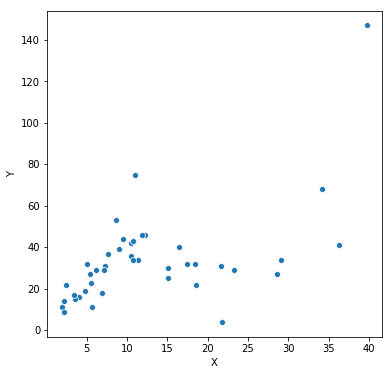

In [12]:
plt.figure(figsize=(6,6))
sns.scatterplot(data['X'], data['Y'])
plt.show()

In [13]:
data.head()

,X,Y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53


In [14]:
X_train = data['X'].values
Y_train = data['Y'].values

n_samples = X_train.shape[0]

step:0, theta0=0.034, theta1=0.547, cost=598.962
step:1000, theta0=14.228, theta1=0.748, cost=311.053
step:2000, theta0=21.474, theta1=0.560, cost=256.568
step:3000, theta0=25.177, theta1=0.464, cost=242.338
step:4000, theta0=27.070, theta1=0.415, cost=238.622
step:5000, theta0=28.037, theta1=0.390, cost=237.651
step:6000, theta0=28.531, theta1=0.377, cost=237.397
step:7000, theta0=28.784, theta1=0.371, cost=237.331
step:8000, theta0=28.913, theta1=0.367, cost=237.314
step:9000, theta0=28.979, theta1=0.366, cost=237.309
step:10000, theta0=29.013, theta1=0.365, cost=237.308
step:11000, theta0=29.030, theta1=0.364, cost=237.308
step:12000, theta0=29.039, theta1=0.364, cost=237.308
step:13000, theta0=29.043, theta1=0.364, cost=237.308
step:14000, theta0=29.045, theta1=0.364, cost=237.308
step:15000, theta0=29.047, theta1=0.364, cost=237.308
step:16000, theta0=29.047, theta1=0.364, cost=237.308
step:17000, theta0=29.047, theta1=0.364, cost=237.308
step:18000, theta0=29.047, theta1=0.364, c

/Users/80151/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/80151/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


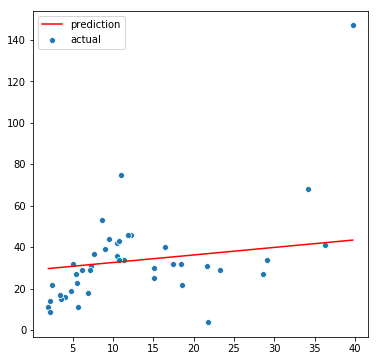

In [15]:
X = tf.placeholder(name='X', dtype=tf.float32)
Y = tf.placeholder(name='Y', dtype=tf.float32)

theta0 = tf.Variable(0.0, name='theta0')
theta1 = tf.Variable(0.0, name='theta1')

lambda_param = tf.constant(10000, name='lambda', dtype=tf.float32)

y_pred = theta0 + theta1*X

cost_function = (1.0/(2.0*n_samples)) * tf.reduce_sum(tf.pow((y_pred - Y), 2)) + (lambda_param / (2.0 * n_samples)) * tf.pow(theta1, 2)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost_function)

feed_dict = {
    X : X_train,
    Y : Y_train
}
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(30000):
        sess.run(optimizer, feed_dict)
        
        if(step % 1000 == 0):
            tt0 = sess.run(theta0)
            tt1 = sess.run(theta1)
            cost = sess.run(cost_function, feed_dict)
            
            print(f"step:{step}, theta0={tt0:.3f}, theta1={tt1:.3f}, cost={cost:.3f}")

    y_pred = sess.run(y_pred, { X : X_train })
    plt.figure(figsize=(6,6))
    sns.scatterplot(X_train, Y_train, label='actual')
    sns.lineplot(X_train, y_pred, c='r', label='prediction')
    plt.show()


### Same problem as above but change the way to implement

In [16]:
data['X0'] = 1
X_train = data[['X0', 'X']].values
Y_train = data['Y'].values.reshape(-1, 1)

n_features = X_train.shape[1]
n_samples = X_train.shape[0]

step:0, theta0=0.034, theta1=0.547, cost=598.962
step:1000, theta0=14.228, theta1=0.748, cost=311.053
step:2000, theta0=21.474, theta1=0.560, cost=256.568
step:3000, theta0=25.177, theta1=0.464, cost=242.338
step:4000, theta0=27.070, theta1=0.415, cost=238.622
step:5000, theta0=28.037, theta1=0.390, cost=237.651
step:6000, theta0=28.531, theta1=0.377, cost=237.397
step:7000, theta0=28.784, theta1=0.371, cost=237.331
step:8000, theta0=28.913, theta1=0.367, cost=237.314
step:9000, theta0=28.979, theta1=0.366, cost=237.309
step:10000, theta0=29.013, theta1=0.365, cost=237.308
step:11000, theta0=29.030, theta1=0.364, cost=237.308
step:12000, theta0=29.039, theta1=0.364, cost=237.308
step:13000, theta0=29.043, theta1=0.364, cost=237.308
step:14000, theta0=29.045, theta1=0.364, cost=237.308
step:15000, theta0=29.047, theta1=0.364, cost=237.308
step:16000, theta0=29.047, theta1=0.364, cost=237.308
step:17000, theta0=29.047, theta1=0.364, cost=237.308
step:18000, theta0=29.047, theta1=0.364, c

/Users/80151/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/80151/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


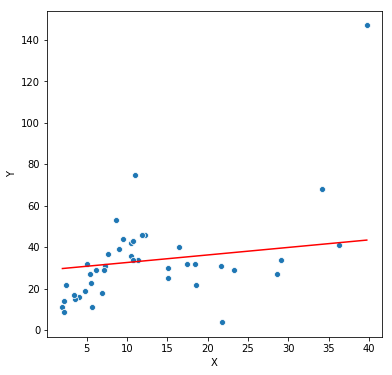

In [20]:
X = tf.placeholder(name='X', shape=[None, n_features], dtype=tf.float32)
Y = tf.placeholder(name='Y', shape=[None, 1], dtype=tf.float32)

thetas = tf.Variable(tf.zeros(shape=[n_features, 1], dtype=tf.float32), name='thetas')

lambda_param = tf.constant(10000, name='lambda', dtype=np.float32)

y_pred = tf.matmul(X, thetas)

cost_function = (1.0 / (2.0*n_samples)) * tf.reduce_sum(tf.pow(y_pred - Y, 2)) + (lambda_param / (2.0*n_samples)) * tf.reduce_sum(tf.pow(thetas[1], 2))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost_function)

feed_dict = {
    X : X_train,
    Y : Y_train
}

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(30000):
        sess.run(optimizer, feed_dict)
        
        if(step % 1000 == 0):
            tts = sess.run(thetas)
            tt0 = tts[0][0]
            tt1 = tts[1][0]
            cost = sess.run(cost_function, feed_dict)
            
            print(f"step:{step}, theta0={tt0:.3f}, theta1={tt1:.3f}, cost={cost:.3f}")
    y_preds = sess.run(y_pred, { X : X_train })
    plt.figure(figsize=(6,6))
    sns.scatterplot(data['X'], data['Y'])
    sns.lineplot(data['X'], y_preds.flatten(), c='r')
    plt.show()